In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('cars-dataset.csv')

# 1. EDA & Pre-processing

In [4]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [5]:
df.shape

(398, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 21.8+ KB


#### From the above output, we have noticed that except "car name" and "hp" cols other are numeric type. Now we are in need to convert hp from object type to int type.

### Non numerical value checking

In [7]:
df.applymap(np.isreal).sum()

car name      0
cyl         398
disp        398
hp            0
wt          398
acc         398
yr          398
mpg         398
dtype: int64

#### As we alreay stated, from the above output we confirmed that car name and hp varibales has non-numeric data.

### Null Valus Checking

In [8]:
df.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

#### We do not find any nul values in the data set.

### Other non-numeric character(?) checking

In [9]:
df['hp'].loc[df['hp'] == '?'].count()

6

#### From the above output, we have noticed that there are 6 "?" present in the hp column.

### Data type conversion (from object to int)

In [10]:
nl = df['hp'].loc[df['hp'] != '?']
nlmean = nl.astype(str).astype(int).mean()

### "?" to maen replacement

In [11]:
df['hp'] = df['hp'].replace('?',nlmean).astype(int)
df['hp'].head()

0    130
1    165
2    150
3    150
4    140
Name: hp, dtype: int32

### Data Type and numeric confirmation

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null int32
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int32(1), int64(3), object(1)
memory usage: 21.8+ KB


In [13]:
df.applymap(np.isreal).sum()

car name      0
cyl         398
disp        398
hp          398
wt          398
acc         398
yr          398
mpg         398
dtype: int64

#### From the above two outputs, we confirmed that there is no non-numerical valus and object type col except car name.

In [14]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


#### Now our car_dataset has been cleaned and ready to proceed further.

In [15]:
df.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.462312,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,38.199230,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


# 2. Use pair plot or scatter matrix to visualize how the different variables are related.

C:\anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


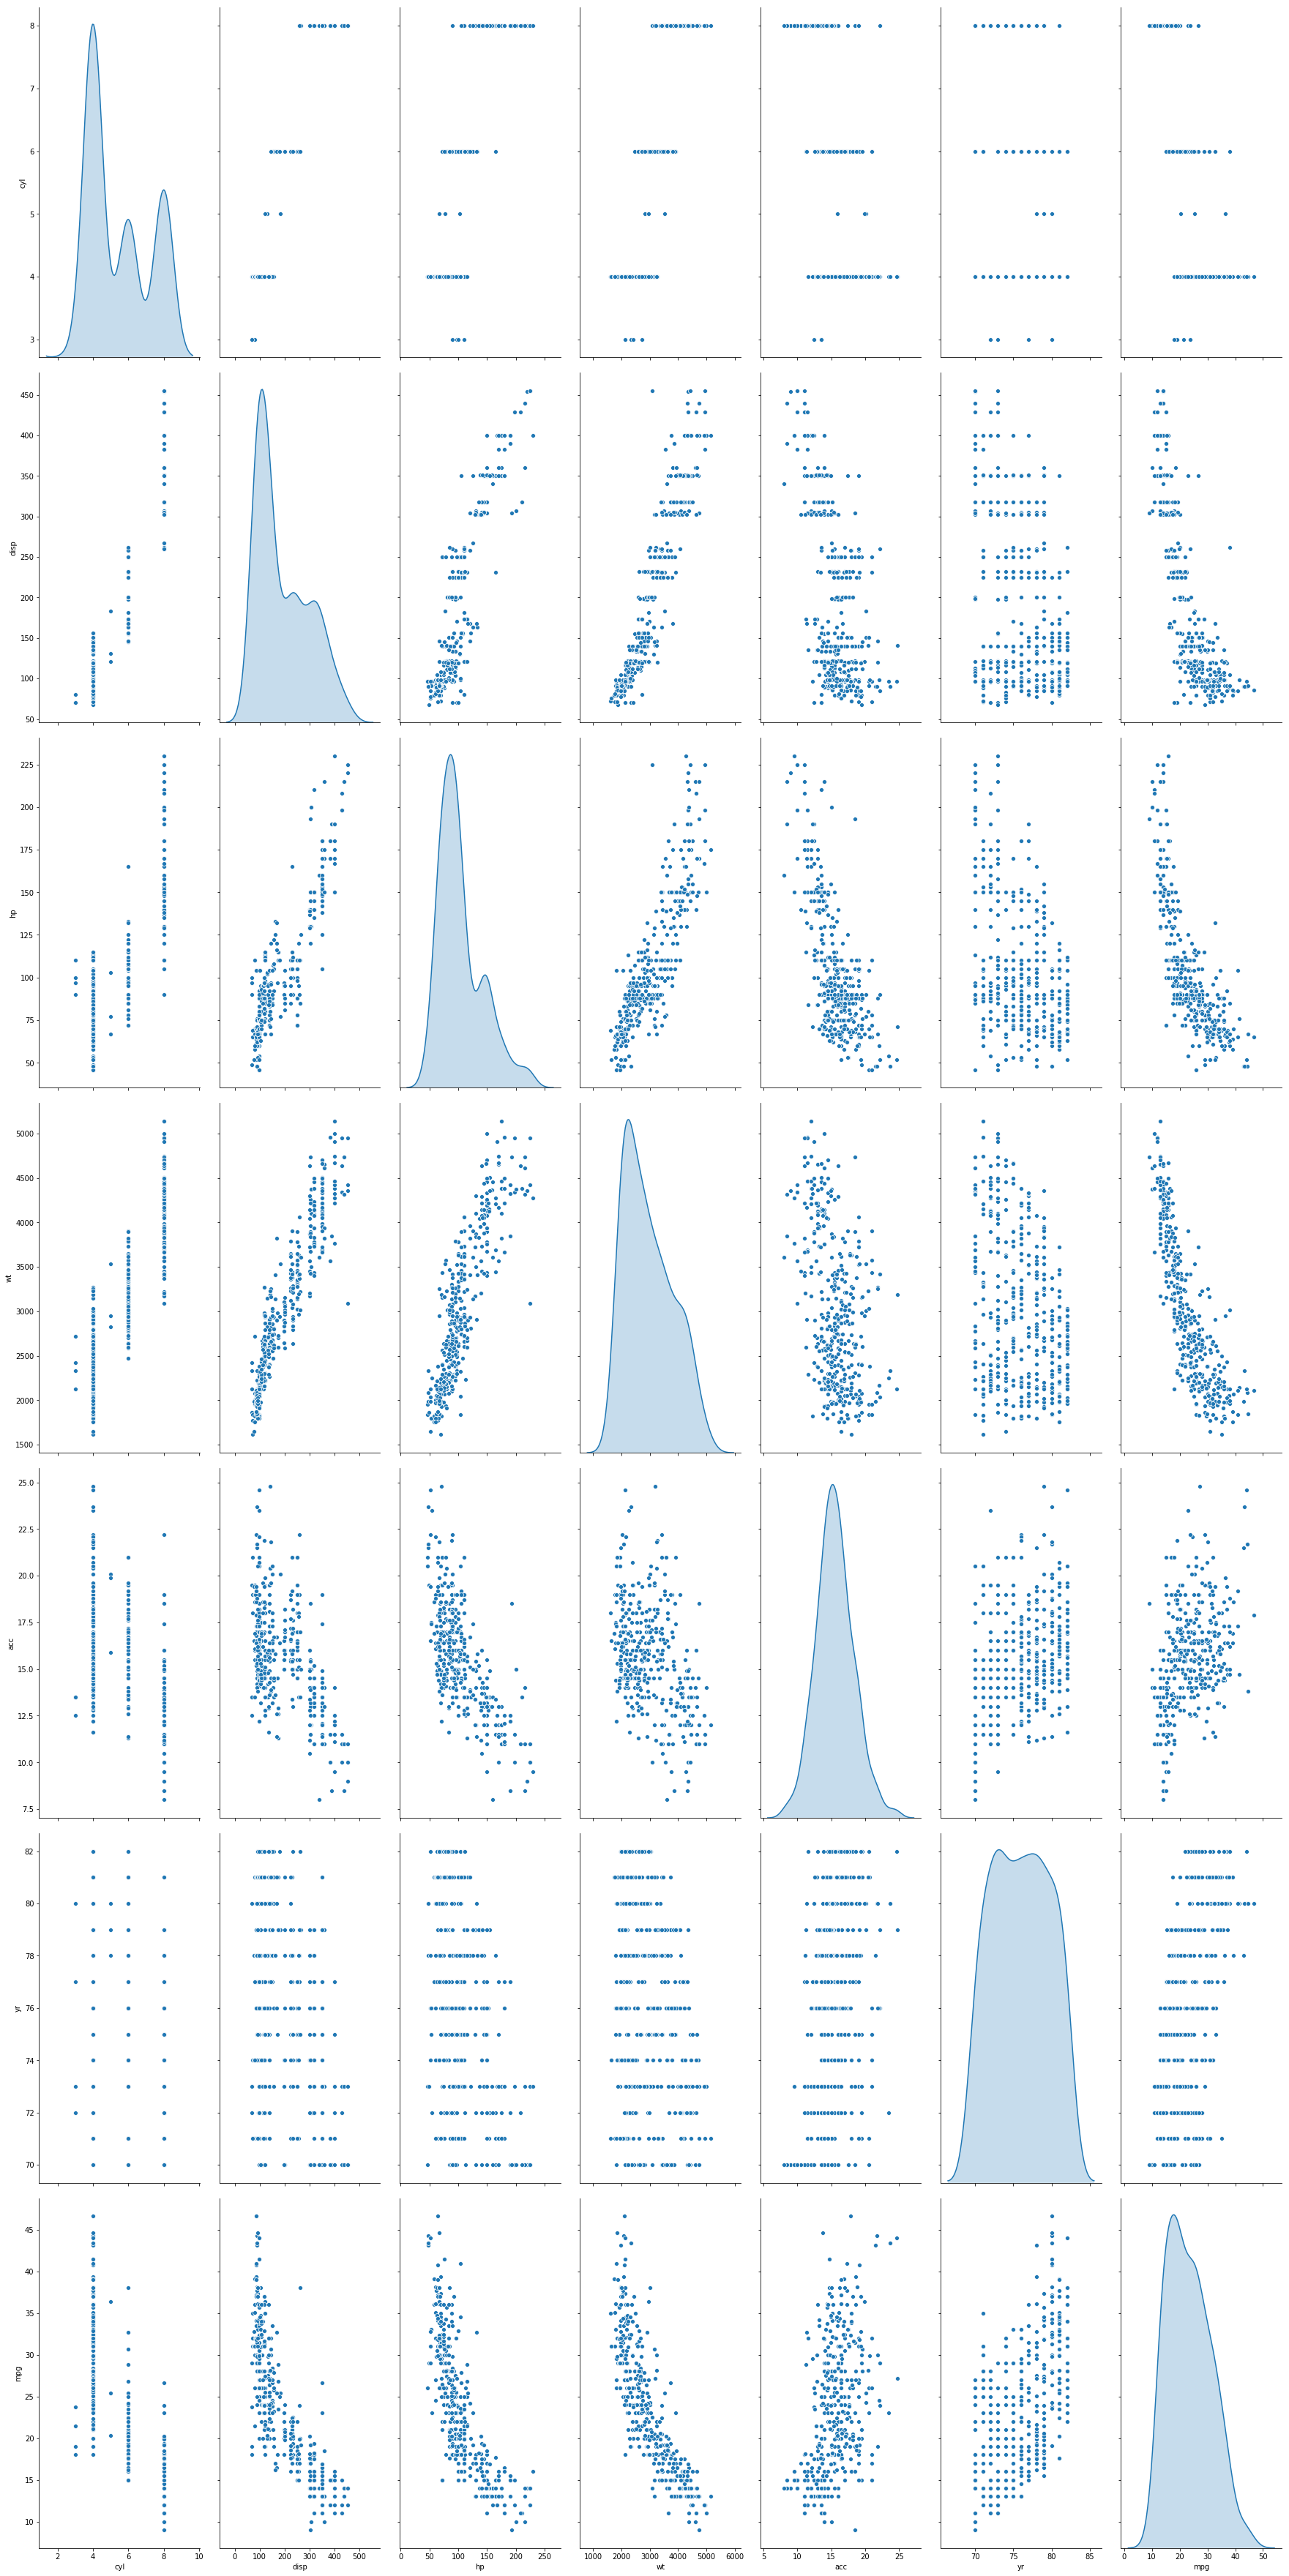

In [16]:
import seaborn as sns
%matplotlib inline
sns.pairplot(df, size=7,aspect=0.5 , diag_kind='kde')

From the above pairplot study, we have observed below listed points.
1. From the Gaussian curves in the plot, we can visually identify different clusters existing in the dataset. Those are.
   (a) 3 good clusters formed in the cyl column. We inferred that sinnificantly the cars are used 3 kind of # of cylinders.
   (b) significant peaks identified in the disp column.
   (c) two clusters formed in the hp column
   (d) no clusters formed in the acc, yr and mpg columns.
   
   Also noticed that depends on the cylinder usage count, entire data set splitted as 3 clusters. 
    
2. Apart from clusters, we can find good corelation between columns.
   (a) negative corelation between following columns(disp, hp, wt) with "mpg"
   (b) slight negative corelation between acc with following cols(disp and hp)
   (d) positive corelation between disp, hp and wt
   
3. We do not find any coreation and cluster formation in the yr column.

Conclusion: Except "yr" variable, visually we can identyfy cylinder formed the 3 clusters in the entire data set and find sinificant positive and negative corelation with mpg. It has shown the data set has good variable to get the robust classification.

### Corelation between (cyl, disp, wt, hp, acc) and mpg

C:\anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


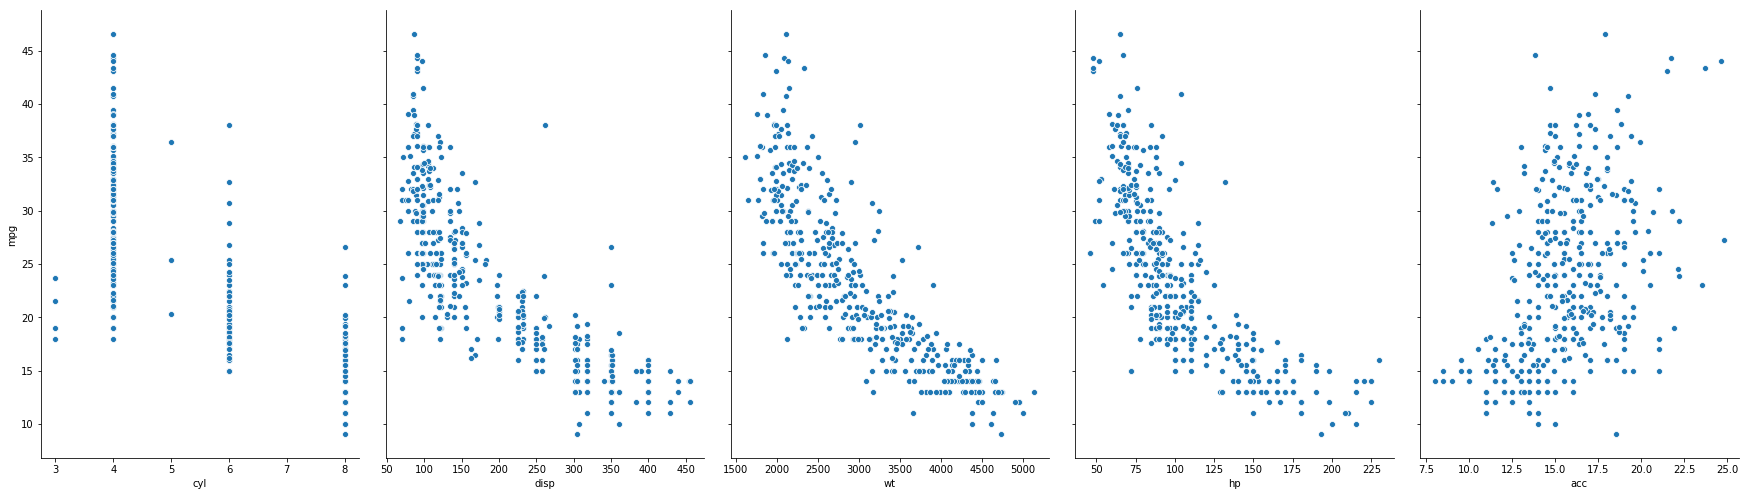

In [17]:
sns.pairplot(df, x_vars=['cyl','disp','wt','hp','acc'], y_vars='mpg', size=7, aspect=0.7)

#### From the above pairplots, we can easly findt he corelation between following cols(cyl, disp,wt,hp,acc) and mpg.

### Number of cylinders Distribution

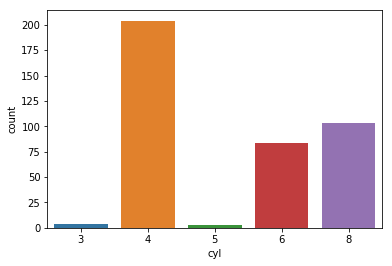

In [18]:
sns.countplot(x='cyl',data=df)

From the above plot, we can confirmed that there are 3 types of cylinder counts are mostly used in the data set. And from pair plot, we can confirmed that the same cluster formation also happend in the mpg data. That is we can conclude that the mpg data set clusterd as 3 part based on the cylinder count usage.

Conclusion: We can negotiate the cylinder count 3 and 5 since it is not a significant volume in the supplied data set.

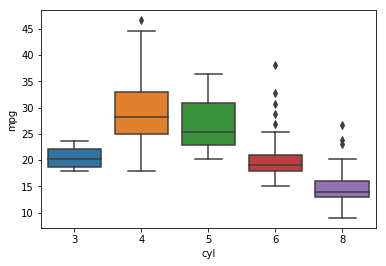

In [19]:
sns.boxplot(x="cyl", y="mpg", data=df)

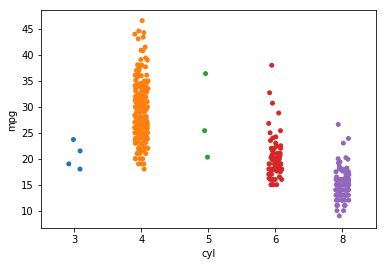

In [20]:
sns.stripplot(x="cyl", y="mpg", data=df)

From the above box plot, we noticed that the count of cyliner ditribution clearly splitted the mpg date.
1. 3 cyl count distributed between 18 to 22 mpg
2. 4 and 5 cylinder dstributed between 18 to 45 mpg
3. 6 and 8 cylinder count distributed from 10 to 20 mpg.

Conclusion: Based on the cylinder count uses the mpg splitted in 2 parts. One is from 10 to 20 another one from 18 to 45.

There are very few higher outliers present in the cylinder count 6 and 8.

### Distibution of Model of the car

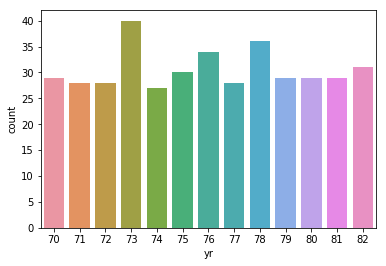

In [21]:
sns.countplot(x='yr',data=df)

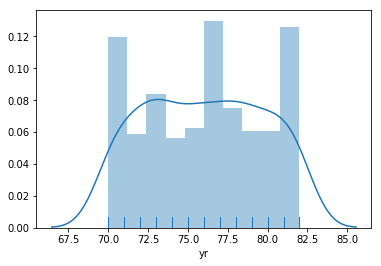

In [22]:
sns.distplot(df['yr'],hist=True,rug=True,bins=10,kde=True)

#### From the above distribution plot, we infered that the "yr" data more or less ditributed normaaly. we do not find any right and left skew.

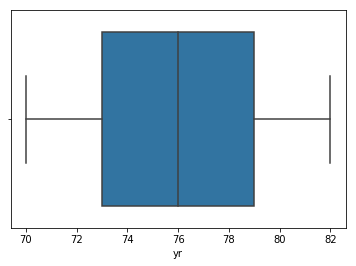

In [23]:
sns.boxplot(x=df["yr"])

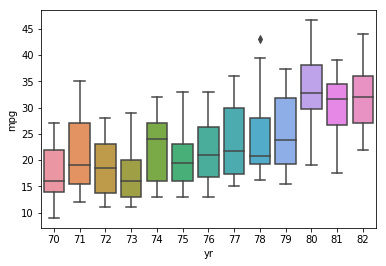

In [24]:
sns.boxplot(x="yr", y="mpg", data=df)

(60, 100)

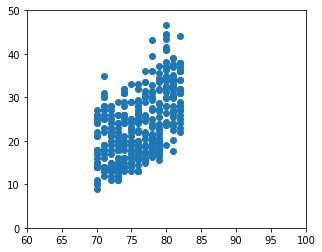

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
ax = plt.scatter(x="yr", y="mpg", data=df)
plt.ylim(0, 50)
plt.xlim(60, 100)

#### From the above box plot and scatter plot, we concluded that from model 70 to 79, the distribution is spreaded from 10 to 30 mpg. We could not find any sinficant identification of the split up. But from the model 80 to 82 the mpg distribution quait good from 27.5 to 45.
But over all ther is no significant usage to make cluster based on the modelof the car.

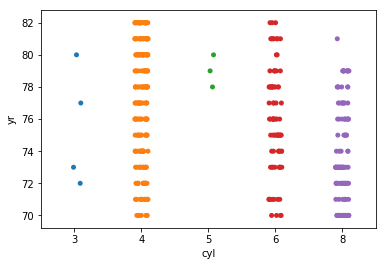

In [26]:
sns.stripplot(x="cyl", y="yr", data=df)

### From the above plot, we concluded that there is no sinificant cluster formation in the car model data based on number of cylinder usage.

## Distribution of Displacement

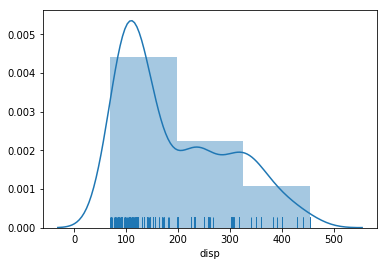

In [27]:
sns.distplot(df['disp'],hist=True,rug=True,bins=3,kde=True)

#### From the distribution plot, we concluded that the displacement data is not a normal distribution. It skewed right.

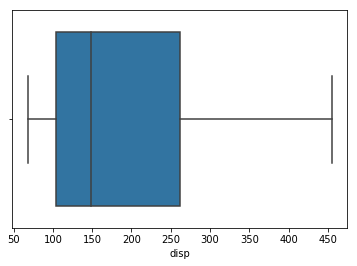

In [28]:
sns.boxplot(x=df["disp"])

From the box plot itself, we conclude that the distribution is happend from 100 to 270. from 270 to 450 the skewd. Also we noticed that there is no significant outlier in the displacement distribuion.

(0, 500)

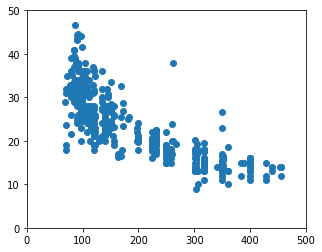

In [29]:
plt.figure(figsize=(5,4))
ax = plt.scatter(x="disp", y="mpg", data=df)
plt.ylim(0, 50)
plt.xlim(0, 500)

#### From the above scatter plot, clearly we understand that when displacement value increase the mpg reduced.

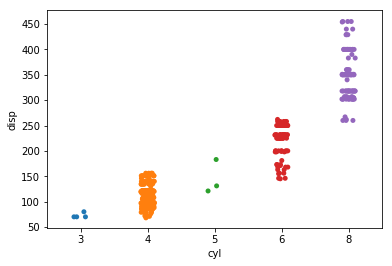

In [30]:
sns.stripplot(x="cyl", y="disp", data=df)

#### We can identify the three clear cluster in the displacement data based on cylider count usage.

## Distribution of Horse Power

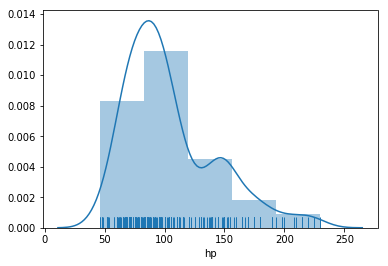

In [31]:
sns.distplot(df['hp'],hist=True,rug=True,bins=5,kde=True)

From the above distribution we identyfied that the orse power data disributuin is not a normal disribution and it skewed right.
We can see two crear peaks in the data set.

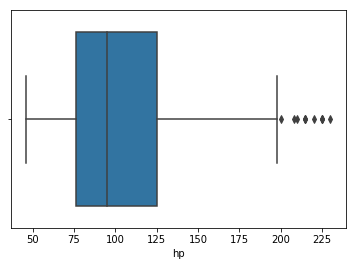

In [32]:
sns.boxplot(x=df["hp"])

#### From the box plot itself, we conclude that the distribution is happend from 50 to 200. Also we noticed that few outlier in the horse power distribuion.

(0, 300)

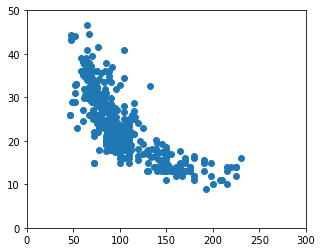

In [33]:
plt.figure(figsize=(5,4))
ax = plt.scatter(x="hp", y="mpg", data=df)
plt.ylim(0, 50)
plt.xlim(0, 300)

From the scatyter plot we noticed that while horese power increases, the miles per gallon sinificantly decreases. It clearly visuvalized the negative corelation as already noted in the parplot.

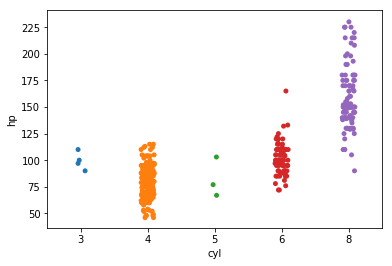

In [34]:
sns.stripplot(x="cyl", y="hp", data=df)

#### From the above plot we can identify the 2 clusters in the horse pour data based on usage of cylinder count.

## Distribution of Weight

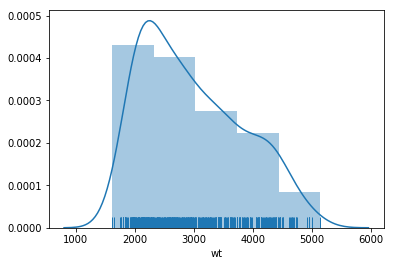

In [35]:
sns.distplot(df['wt'],hist=True,rug=True,bins=5,kde=True)

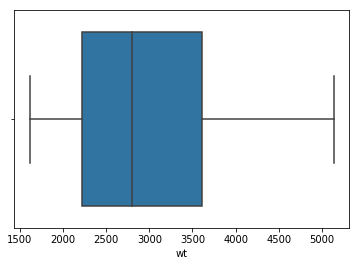

In [36]:
sns.boxplot(x=df["wt"])

(1000, 6000)

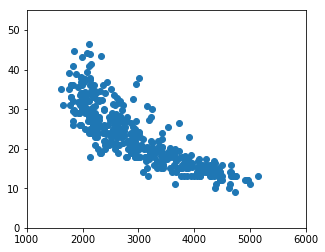

In [37]:
plt.figure(figsize=(5,4))
ax = plt.scatter(x="wt", y="mpg", data=df)
plt.ylim(0, 55)
plt.xlim(1000, 6000)

#### Observation Weight distribution: right skew distribution, no outliers and clear negative coreation with mpg.
It means, while weight of the car increases the mpg of the car decreases.

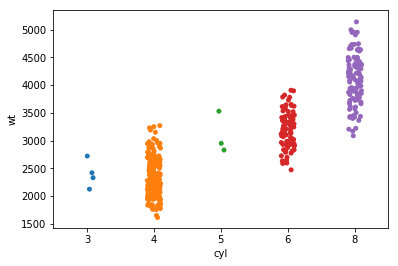

In [38]:
sns.stripplot(x="cyl", y="wt", data=df)

#### From the above plot we can identify the 2 clusters in the wight of the car data based on the usage of cylinder count.

## Distribution of Accleration 

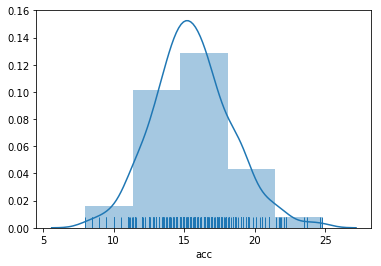

In [39]:
sns.distplot(df['acc'],hist=True,rug=True,bins=5,kde=True)

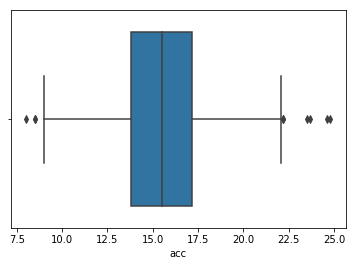

In [40]:
sns.boxplot(x=df["acc"])

(5, 30)

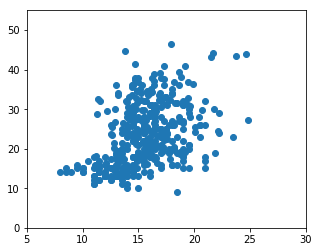

In [41]:
plt.figure(figsize=(5,4))
ax = plt.scatter(x="acc", y="mpg", data=df)
plt.ylim(0, 55)
plt.xlim(5, 30)

### Observation of accleration ditribution: normal distribution, few outliers and no significant corelation with mpg.

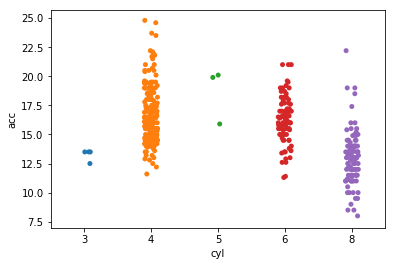

In [42]:
sns.stripplot(x="cyl", y="acc", data=df)

#### From the plot, there is no significant clusters formed in the acceleration of the car based on the cylinder count usage.

### Distribution of mpg of the car

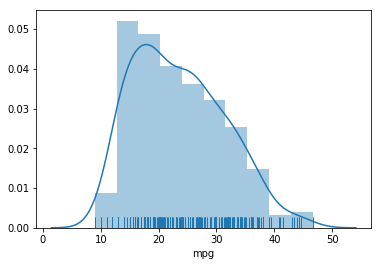

In [43]:
sns.distplot(df['mpg'],hist=True,rug=True,bins=10,kde=True)

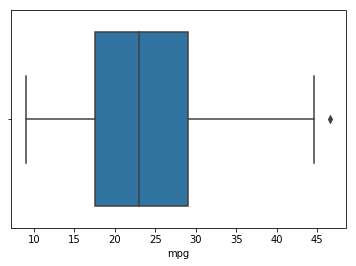

In [44]:
sns.boxplot(x=df["mpg"])

From the above distribution and box plot we ahve notied that mpg of the car slightly skewed right and there is no significant out liers in the mpg data.

## Conclusion of the Exploratory visual analysis:

Corelation with mpg:
The following variables of the car "displacement", "horese power" and "weight" of the car highly negative corelate with miles per gallon of the car.

cluster Formation:
On the basis of number of cylinder usage of the the following variables of the car "mpg", "displacement", "hp", "weight" classified as 2 to 3 clusters in the data set
The other variables such as model of the car and acceleration of the car does not have significant corelation with mpg of the car. And also those two variable not created any cluster formation in the data set.

Outliers: Significant higher value outliers find in the horese power and cylinder count. And lower and higher out liers found in the acceleration of the car. Other than this ther is no significant outliers present in the car data set.

# 4. Use linear regression model on different clusters separately and print the coefficients of the models individually

In [45]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


### Dropping car name col from data set

In [46]:
df1 = df.drop(['car name'], axis = 1) 

In [47]:
df1.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130,3504,12.0,70,18.0
1,8,350.0,165,3693,11.5,70,15.0
2,8,318.0,150,3436,11.0,70,18.0
3,8,304.0,150,3433,12.0,70,16.0
4,8,302.0,140,3449,10.5,70,17.0


### zscore scalling of the data set

In [48]:
from scipy.stats import zscore

In [49]:
df2 = df1.apply(zscore)

In [50]:
df2.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.669381,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.586783,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.193611,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.193611,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.931496,0.565841,-1.840117,-1.627426,-0.834543


### Using KMeans algorithm finding optimal number of clusters in the data set

In [51]:
from sklearn.cluster import KMeans

In [52]:
cluster_errors = []
cluster_range = range(1,10)   
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df2)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df2 = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df2[0:10]

,num_clusters,cluster_errors
0,1,2786.000000
1,2,1296.572957
2,3,947.813231
3,4,739.965071
4,5,666.785288
5,6,599.815255
6,7,543.170377
7,8,500.204415
8,9,469.179615


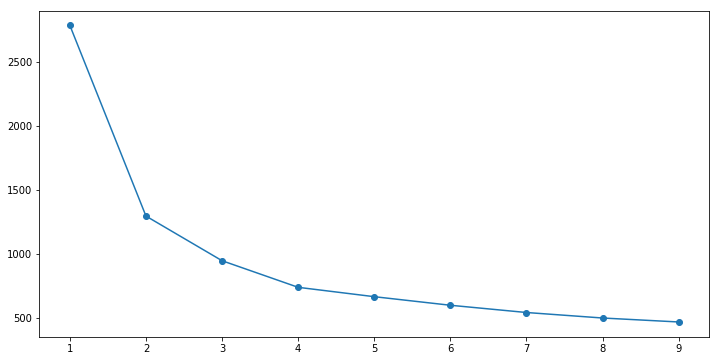

In [53]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df2.num_clusters, clusters_df2.cluster_errors, marker = "o" )

### From the above plot, we concluded that there are 3 optimal clusters formed in the data set.

In [54]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2354, tol=0.0001, verbose=0)

In [55]:
centroids = cluster.cluster_centers_
centroids

array([[-0.85347696, -0.80321374, -0.67297659, -0.78549879,  0.36133415,
         0.30992304,  0.75394661],
       [ 1.49819126,  1.50068407,  1.51090751,  1.40001604, -1.07612225,
        -0.6725559 , -1.15871315],
       [ 0.35772459,  0.24687769, -0.04406312,  0.30829922,  0.28578589,
        -0.00272145, -0.47905415]])

In [56]:
centroid_df = pd.DataFrame(centroids, columns = df2.columns )
centroid_df

,cyl,disp,hp,wt,acc,yr,mpg
0,-0.853477,-0.803214,-0.672977,-0.785499,0.361334,0.309923,0.753947
1,1.498191,1.500684,1.510908,1.400016,-1.076122,-0.672556,-1.158713
2,0.357725,0.246878,-0.044063,0.308299,0.285786,-0.002721,-0.479054


In [57]:
df2['labels'] = pd.DataFrame(cluster.labels_ , columns=list(['labels']))

In [58]:
pd.value_counts(df2['labels'])

0    207
2     96
1     95
Name: labels, dtype: int64

#### From the above output we confirmed that the supplied data set clearly splitted as 3 clusters and there are 207 data in the label of "0" cluster, 96 data classified under label of "2" and 95 data classified under the label of "1".

In [59]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2,

### Label added in the scalled data set df2

In [60]:
df2.head()

,cyl,disp,hp,wt,acc,yr,mpg,labels
0,1.498191,1.090604,0.669381,0.630870,-1.295498,-1.627426,-0.706439,1
1,1.498191,1.503514,1.586783,0.854333,-1.477038,-1.627426,-1.090751,1
2,1.498191,1.196232,1.193611,0.550470,-1.658577,-1.627426,-0.706439,1
3,1.498191,1.061796,1.193611,0.546923,-1.295498,-1.627426,-0.962647,1
4,1.498191,1.042591,0.931496,0.565841,-1.840117,-1.627426,-0.834543,1


## Scalled dataset df2 spilleted as 3 dataset based on labelling created by Kmeans algorithm.

### Define the data set df_1 for under the label of "0"

In [61]:
df_1 = df2[df2['labels'] == 0]

In [62]:
df_1.head()

,cyl,disp,hp,wt,acc,yr,mpg,labels
14,-0.856321,-0.772295,-0.248021,-0.707544,-0.206262,-1.627426,0.062185,0
18,-0.856321,-0.925936,-0.431502,-0.993671,-0.387801,-1.627426,0.446497,0
19,-0.856321,-0.925936,-1.532384,-1.342463,1.790672,-1.627426,0.318393,0
20,-0.856321,-0.801103,-0.457713,-0.352841,0.701436,-1.627426,0.190289,0
21,-0.856321,-0.829911,-0.379079,-0.638968,-0.387801,-1.627426,0.062185,0


In [63]:
df_1.shape

(207, 8)

### Define the data set df_2 for under the label of "1"

In [64]:
df_2 = df2[df2['labels'] == 1]

In [65]:
df_2.head()

,cyl,disp,hp,wt,acc,yr,mpg,labels
0,1.498191,1.090604,0.669381,0.630870,-1.295498,-1.627426,-0.706439,1
1,1.498191,1.503514,1.586783,0.854333,-1.477038,-1.627426,-1.090751,1
2,1.498191,1.196232,1.193611,0.550470,-1.658577,-1.627426,-0.706439,1
3,1.498191,1.061796,1.193611,0.546923,-1.295498,-1.627426,-0.962647,1
4,1.498191,1.042591,0.931496,0.565841,-1.840117,-1.627426,-0.834543,1


In [66]:
df_2.shape

(95, 8)

### Define the data set df_3 for under the label of "2"

In [67]:
df_3 = df2[df2['labels'] == 2]

In [68]:
df_3.head()

,cyl,disp,hp,wt,acc,yr,mpg,labels
15,0.320935,0.043923,-0.248021,-0.162483,-0.024722,-1.627426,-0.194023,2
16,0.320935,0.053526,-0.195598,-0.232242,-0.024722,-1.627426,-0.706439,2
17,0.320935,0.063128,-0.510136,-0.453340,0.156817,-1.627426,-0.322127,2
24,0.320935,0.053526,-0.379079,-0.381217,-0.206262,-1.627426,-0.322127,2
33,0.320935,0.370411,-0.116964,-0.397770,-0.932419,-1.356642,-0.578335,2


In [69]:
df_3.shape

(96, 8)

## Linear regression model on Cluster df_1

In [70]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [71]:
X1 = df_1.drop(labels= ["mpg","labels"] , axis = 1)
X1.head()

,cyl,disp,hp,wt,acc,yr
14,-0.856321,-0.772295,-0.248021,-0.707544,-0.206262,-1.627426
18,-0.856321,-0.925936,-0.431502,-0.993671,-0.387801,-1.627426
19,-0.856321,-0.925936,-1.532384,-1.342463,1.790672,-1.627426
20,-0.856321,-0.801103,-0.457713,-0.352841,0.701436,-1.627426
21,-0.856321,-0.829911,-0.379079,-0.638968,-0.387801,-1.627426


In [72]:
y1 = df_1[["mpg"]]
y1.head()

,mpg
14,0.062185
18,0.446497
19,0.318393
20,0.190289
21,0.062185


In [73]:
from sklearn.model_selection import train_test_split
test_size = 0.30 
seed = 7
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=test_size, random_state=seed)

In [74]:
X1_train.shape

(144, 6)

In [75]:
X1_test.shape

(63, 6)

In [76]:
regression_model_1 = LinearRegression()
regression_model_1.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
Train1_Score = regression_model_1.score(X1_train, y1_train)
print(Train1_Score)

0.6875652682199493


In [78]:
Test1_Score = regression_model_1.score(X1_test, y1_test)
print(Test1_Score)

0.6666014726820675


In [79]:
df_1_Intercept = regression_model_1.intercept_
df_1_Coef = (regression_model_1.coef_)

In [80]:
print(df_1_Intercept)
print(df_1_Coef)

[0.98673748]
[[ 1.87476355 -0.80449161 -0.0707056  -0.66952933  0.02581167  0.4465409 ]]


## Linear regression model on Cluster df_2

In [81]:
X2 = df_2.drop(labels= ["mpg","labels"] , axis = 1)
X2.head()

,cyl,disp,hp,wt,acc,yr
0,1.498191,1.090604,0.669381,0.630870,-1.295498,-1.627426
1,1.498191,1.503514,1.586783,0.854333,-1.477038,-1.627426
2,1.498191,1.196232,1.193611,0.550470,-1.658577,-1.627426
3,1.498191,1.061796,1.193611,0.546923,-1.295498,-1.627426
4,1.498191,1.042591,0.931496,0.565841,-1.840117,-1.627426


In [82]:
y2 = df_2[["mpg"]]
y2.head()

,mpg
0,-0.706439
1,-1.090751
2,-0.706439
3,-0.962647
4,-0.834543


In [83]:
from sklearn.model_selection import train_test_split
test_size = 0.30 
seed = 7
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=test_size, random_state=seed)

In [84]:
X2_train.shape

(66, 6)

In [85]:
X2_test.shape

(29, 6)

In [86]:
regression_model_2 = LinearRegression()
regression_model_2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
Train2_Score = regression_model_2.score(X2_train, y2_train)
print(Train2_Score)

0.540078782122479


In [88]:
Test2_Score = regression_model_2.score(X2_test, y2_test)
print(Test2_Score)

0.4698605295030062


In [89]:
df_2_Intercept = regression_model_2.intercept_
df_2_Coef = regression_model_2.coef_

In [90]:
print(df_2_Intercept)
print(df_2_Coef)

[-1.35975161]
[[ 0.30003551 -0.15362211 -0.14060668  0.00045725 -0.29633921  0.19332016]]


## Linear regression model on Cluster df_3

In [91]:
X3 = df_3.drop(labels= ["mpg","labels"] , axis = 1)
X3.head()

,cyl,disp,hp,wt,acc,yr
15,0.320935,0.043923,-0.248021,-0.162483,-0.024722,-1.627426
16,0.320935,0.053526,-0.195598,-0.232242,-0.024722,-1.627426
17,0.320935,0.063128,-0.510136,-0.453340,0.156817,-1.627426
24,0.320935,0.053526,-0.379079,-0.381217,-0.206262,-1.627426
33,0.320935,0.370411,-0.116964,-0.397770,-0.932419,-1.356642


In [92]:
y3 = df_3[["mpg"]]
y3.head()

,mpg
15,-0.194023
16,-0.706439
17,-0.322127
24,-0.322127
33,-0.578335


In [93]:
from sklearn.model_selection import train_test_split
test_size = 0.30 
seed = 7
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=test_size, random_state=seed)

In [94]:
X3_train.shape

(67, 6)

In [95]:
X3_test.shape

(29, 6)

In [96]:
regression_model_3 = LinearRegression()
regression_model_3.fit(X3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [97]:
Train3_Score = regression_model_3.score(X3_train, y3_train)
print(Train3_Score)

0.5779441470561872


In [98]:
Test3_Score = regression_model_3.score(X3_test, y3_test)
print(Test3_Score)

-0.3930054888987293


In [99]:
df_3_Intercept = regression_model_3.intercept_
df_3_Coef = regression_model_3.coef_

In [100]:
print(df_3_Intercept)
print(df_3_Coef)

[-0.33832058]
[[ 0.03233547 -0.17428165 -0.24988884 -0.1458387  -0.2687108   0.25104227]]


# Coefficients of the models individually 

## Train and Test Score of the model cluster wise

In [101]:
Train_Test_Score = {"cluster": [0,1,2],
     "Train Score": [Train1_Score,Train2_Score,Train3_Score],
     "Test Score": [Test1_Score,Test2_Score,Test3_Score]}

In [102]:
df_Train_Test_Score = pd.DataFrame(Train_Test_Score)

In [103]:
df_Train_Test_Score.head()

,cluster,Train Score,Test Score
0,0,0.687565,0.666601
1,1,0.540079,0.469861
2,2,0.577944,-0.393005


## Intercept of the model cluster wise

In [104]:
Intercept = {"cluster": [0,1,2],
    "Intercept":[df_1_Intercept,df_2_Intercept,df_3_Intercept]}

In [105]:
df_Intercept = pd.DataFrame(Intercept)

In [106]:
df_Intercept.head()

,cluster,Intercept
0,0,[0.986737482930402]
1,1,[-1.359751612396963]
2,2,[-0.33832058063042925]


## Coefficient of the model cluster wise

### Coefficients of the Cluster Label "0"

In [109]:
for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_1.coef_[0][idx]))

The coefficient for cyl is 1.8747635462030754
The coefficient for disp is -0.8044916084137422
The coefficient for hp is -0.07070560194513129
The coefficient for wt is -0.6695293306439201
The coefficient for acc is 0.025811665065960387
The coefficient for yr is 0.44654090118492473


### Coefficients of the Cluster Label "1"

In [110]:
for idx, col_name in enumerate(X2_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_2.coef_[0][idx]))

The coefficient for cyl is 0.3000355092621236
The coefficient for disp is -0.1536221073842041
The coefficient for hp is -0.140606679852864
The coefficient for wt is 0.0004572523852981736
The coefficient for acc is -0.29633920531313684
The coefficient for yr is 0.19332016233604551


### Coefficients of the Cluster Label "2"

In [111]:
for idx, col_name in enumerate(X3_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_3.coef_[0][idx]))

The coefficient for cyl is 0.03233546768065909
The coefficient for disp is -0.17428164775216387
The coefficient for hp is -0.24988883684973934
The coefficient for wt is -0.14583870289150735
The coefficient for acc is -0.2687107988588068
The coefficient for yr is 0.25104226911044647


## Conclusion: The above outputs illustrated the model accuracy, Coefficients and Intercepts of the each clusters.
From that output, we noticed that though we applied the Knn model still accuracy is not good. We inferred that still need to improve the model to get better accuracy than now.